In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import raw data
dri17_raw = pd.read_excel('DRI FY2017.xlsx')
dri16_raw = pd.read_excel('DRI FY2016.xlsx')
empinfo = pd.read_excel('all_empinfo_short.xlsx')

In [4]:
len(dri17_raw), len(dri16_raw)

(58862, 56813)

In [5]:
# Add a FY column
dri17_raw['FY'] = 2017
dri16_raw['FY'] = 2016

In [6]:
# Append DRI17 and 16
driall_raw = dri17_raw.append(dri16_raw)
len(driall_raw)

115675

In [7]:
driall_raw.head()

,Status,Document ID,Form Title,Subject Name,Subject Department,Subject Department/Division,Subject Grade,Subject Title,Subject Career Stream,Form Template Name,...,Rater Category,Rater Name,Rater Department,Rater Department/Division,Rater Feedback Status,Competency Name,Competency Rating,Competency Rating Description,Competency Comment,FY
0,Signoff Stage,43612,2017 Direct Report Input Primary Manager for J...,"Dauphin,Jean-Francois",MCD,MCDDE,B02,Division Chief,Economist,2017 Direct Report Input Primary Manager,...,Matrix Report,NaN,NaN,NaN,Completed,Actively and effectively addresses conflict,2,Meets Expectation,NaN,2017
1,Signoff Stage,39370,2017 Direct Report Input Matrix Managers for A...,"Tieman,Alexander Ferenc",FAD,FADF2,A15,Deputy Division Chief,Economist,2017 Direct Report Input Matrix Managers,...,Matrix Report,NaN,NaN,NaN,Completed,Actively and effectively addresses conflict,1,More Than Expected,NaN,2017
2,Signoff Stage,39479,2017 Direct Report Input Matrix Managers for I...,"Petrova,Iva Krasteva",EUR,EURS4,A15,Deputy Chief,Economist,2017 Direct Report Input Matrix Managers,...,Matrix Report,NaN,NaN,NaN,Completed,Actively and effectively addresses conflict,2,Meets Expectation,NaN,2017
3,Signoff Stage,39730,2017 Direct Report Input B4 & B5 Managers for ...,"Gupta,Sanjeev",FAD,FADAI,B04,Deputy Director,Economist,2017 Direct Report Input B4 & B5 Managers,...,Other,NaN,NaN,NaN,Completed,Actively and effectively addresses conflict,2,Meets Expectation,NaN,2017
4,Signoff Stage,39912,2017 Direct Report Input Primary Manager for T...,"Richardson,Thomas J.",JVI,JVI,B02,Director,Specialized Career,2017 Direct Report Input Primary Manager,...,Direct Report,NaN,NaN,NaN,Completed,Actively and effectively addresses conflict,Too New To Rate,Not Observed,NaN,2017


In [8]:
driall_raw['Competency Rating'].value_counts()

Unrated            44793
1                  35010
2                  23435
Too New To Rate     7072
3                   5309
Name: Competency Rating, dtype: int64

In [9]:
# New column with 2 categories: Rated vs. Not Rated
driall_raw['Rated'] = np.where(driall_raw['Competency Rating'].isin([1, 2, 3]), 'Rated', 'Unrated')

In [10]:
driall_raw['Rated'].value_counts()

Rated      63754
Unrated    51921
Name: Rated, dtype: int64

In [11]:
driall_raw['Competency Name'].value_counts()

Fosters inclusion and respect                  16517
Delegates Effectively                          16517
Overall Comments                               16517
Provides coaching, feedback, development       16517
Actively and effectively addresses conflict    16517
Provides Clear Direction                       16517
Motivates & Empowers                           16517
Name: Competency Name, dtype: int64

In [12]:
# Import Preferred Names
prefer = pd.read_excel('Preferred Names.xlsx', skiprows = 1)
prefer_unique = prefer.drop_duplicates('Preferred Name')
prefer_unique = prefer[['ID', 'Preferred Name']]

# Merge Preferred names with DRI
driall_raw = pd.merge(driall_raw,prefer_unique,how = 'left', left_on = 'Subject Name', right_on = 'Preferred Name')


In [13]:
driall_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119460 entries, 0 to 119459
Data columns (total 24 columns):
Status                           119460 non-null object
Document ID                      119460 non-null int64
Form Title                       119460 non-null object
Subject Name                     119460 non-null object
Subject Department               119460 non-null object
Subject Department/Division      119460 non-null object
Subject Grade                    119460 non-null object
Subject Title                    119460 non-null object
Subject Career Stream            119460 non-null object
Form Template Name               119460 non-null object
Current Route Step Name          62767 non-null object
Rater Category                   118503 non-null object
Rater Name                       2373 non-null object
Rater Department                 2373 non-null object
Rater Department/Division        2373 non-null object
Rater Feedback Status            118503 non-null object
C

In [14]:
# Pivot table by Competency and rated/unrated
pivot1 = driall_raw.pivot_table(index = ['ID', 'FY'], columns = ['Competency Name', 'Rated'], values = 'Preferred Name', 
                               aggfunc = 'count' , margins = True)
pivot1 = pd.DataFrame(pivot1).reset_index()
#pivot1 = pivot1.drop('Overall Comments', axis = 1)
pivot1.head()

Competency Name      ID    FY Actively and effectively addresses conflict  \
Rated                                                               Rated   
0                01568E  2016                                         5.0   
1                01568E  2017                                         1.0   
2                01608S  2016                                        11.0   
3                01608S  2017                                        12.0   
4                018569  2016                                         4.0   

Competency Name         Delegates Effectively          \
Rated           Unrated                 Rated Unrated   
0                   2.0                   7.0     NaN   
1                   8.0                   3.0     6.0   
2                   4.0                  13.0     2.0   
3                   4.0                  11.0     5.0   
4                   7.0                   9.0     2.0   

Competency Name Fosters inclusion and respect         Motivates & Empowers  \
Rated                                   Rated Unrated                Rated   
0                                         7.0     NaN                  6.0   
1                                         3.0     6.0                  3.0   
2                                        13.0     2.0                 13.0   
3                                        12.0     4.0                 12.0   
4                                         9.0     2.0                  8.0   

Competency Name         Overall Comments Provides Clear Direction          \
Rated           Unrated          Unrated                    Rated Unrated   
0                   1.0              7.0                      7.0     NaN   
1                   6.0              9.0                      3.0     6.0   
2                   2.0             15.0                     13.0     2.0   
3                   4.0             16.0                     12.0     4.0   
4                   3.0             11.0                      9.0     2.0   

Competency Name Provides coaching, feedback, development            All  
Rated                                              Rated Unrated         
0                                                    6.0     1.0   49.0  
1                                                    4.0     5.0   63.0  
2                                                   13.0     2.0  105.0  
3                                                   12.0     4.0  112.0  
4                                                    6.0     5.0   77.0

In [15]:
# Table for unrated vs. rated % within each behavior, for each individual
pivot2 = driall_raw.groupby(['ID', 'FY','Competency Name', 'Rated'])['Document ID'].count()
pivot2 = pivot2.groupby(level = [0,1, 2]).apply(lambda x: x/x.sum())

pivot2 = pivot2.unstack('Competency Name')
pivot2 = pivot2.reset_index()

pivot2 = pivot2.drop('Overall Comments', axis = 1)
pivot2.head(10)

Competency Name,ID,FY,Rated,Actively and effectively addresses conflict,Delegates Effectively,Fosters inclusion and respect,Motivates & Empowers,Provides Clear Direction,"Provides coaching, feedback, development"
0,01568E,2016,Rated,0.714286,1.000000,1.000000,0.857143,1.000000,0.857143
1,01568E,2016,Unrated,0.285714,NaN,NaN,0.142857,NaN,0.142857
2,01568E,2017,Rated,0.111111,0.333333,0.333333,0.333333,0.333333,0.444444
3,01568E,2017,Unrated,0.888889,0.666667,0.666667,0.666667,0.666667,0.555556
4,01608S,2016,Rated,0.733333,0.866667,0.866667,0.866667,0.866667,0.866667
5,01608S,2016,Unrated,0.266667,0.133333,0.133333,0.133333,0.133333,0.133333
6,01608S,2017,Rated,0.750000,0.687500,0.750000,0.750000,0.750000,0.750000
7,01608S,2017,Unrated,0.250000,0.312500,0.250000,0.250000,0.250000,0.250000
8,018569,2016,Rated,0.363636,0.818182,0.818182,0.727273,0.818182,0.545455
9,018569,2016,Unrated,0.636364,0.181818,0.181818,0.272727,0.181818,0.454545


In [16]:
# Keep unrated rows only
pivot2_unrated = pivot2[pivot2.Rated == 'Unrated']
pivot2_unrated = pivot2_unrated.fillna(0)
pivot2_unrated.head()

Competency Name,ID,FY,Rated,Actively and effectively addresses conflict,Delegates Effectively,Fosters inclusion and respect,Motivates & Empowers,Provides Clear Direction,"Provides coaching, feedback, development"
1,01568E,2016,Unrated,0.285714,0.000000,0.000000,0.142857,0.000000,0.142857
3,01568E,2017,Unrated,0.888889,0.666667,0.666667,0.666667,0.666667,0.555556
5,01608S,2016,Unrated,0.266667,0.133333,0.133333,0.133333,0.133333,0.133333
7,01608S,2017,Unrated,0.250000,0.312500,0.250000,0.250000,0.250000,0.250000
9,018569,2016,Unrated,0.636364,0.181818,0.181818,0.272727,0.181818,0.454545


C:\Users\tle\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


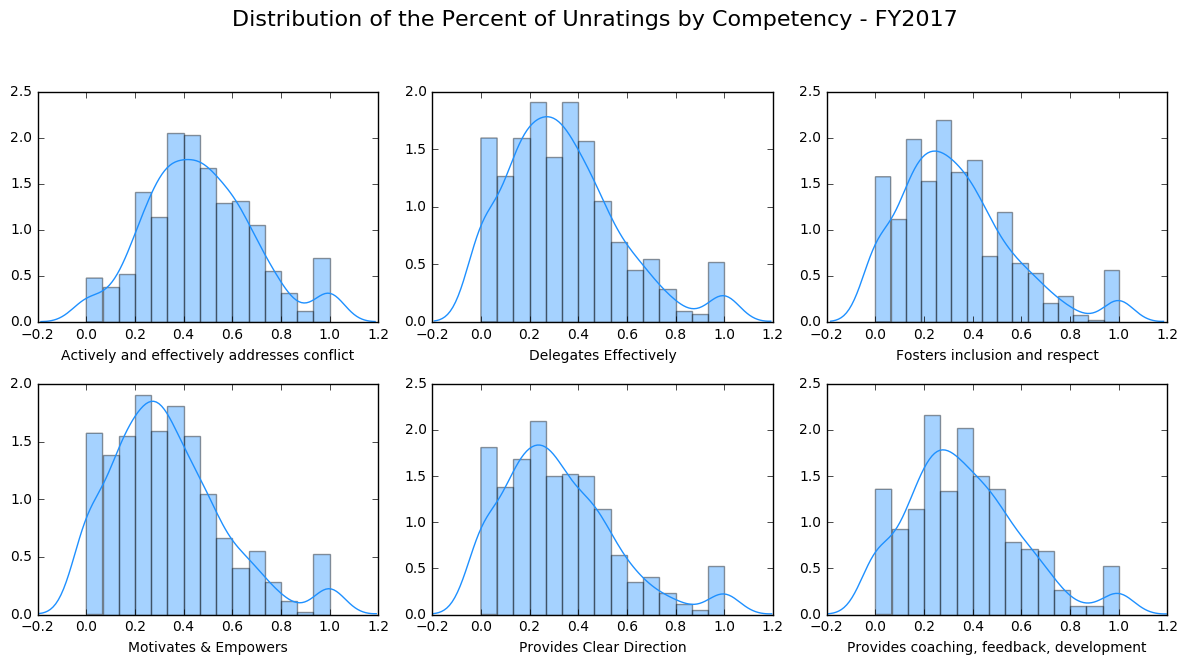

In [17]:
# Create histograms of unrated reponses by each competency for FY2017

fig = plt.figure(1)
plt.suptitle('Distribution of the Percent of Unratings by Competency - FY2017', y = 1.1, fontsize = 16)
plt.subplot(2,3,1)
sns.distplot(pivot2_unrated[pivot2_unrated.FY == 2017]['Actively and effectively addresses conflict'], color = 'dodgerblue')
plt.subplot(2,3,2)
sns.distplot(pivot2_unrated[pivot2_unrated.FY == 2017]['Delegates Effectively'], color = 'dodgerblue')
plt.subplot(2,3,3)
sns.distplot(pivot2_unrated[pivot2_unrated.FY == 2017]['Fosters inclusion and respect'], color = 'dodgerblue')
plt.subplot(2,3,4)
sns.distplot(pivot2_unrated[pivot2_unrated.FY == 2017]['Motivates & Empowers'], color = 'dodgerblue')
plt.subplot(2,3,5)
sns.distplot(pivot2_unrated[pivot2_unrated.FY == 2017]['Provides Clear Direction'], color = 'dodgerblue')
plt.subplot(2,3,6)
sns.distplot(pivot2_unrated[pivot2_unrated.FY == 2017]['Provides coaching, feedback, development'], color = 'dodgerblue')
fig.set_size_inches(w=12,h=6)
fig.tight_layout()

plt.show()

C:\Users\tle\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


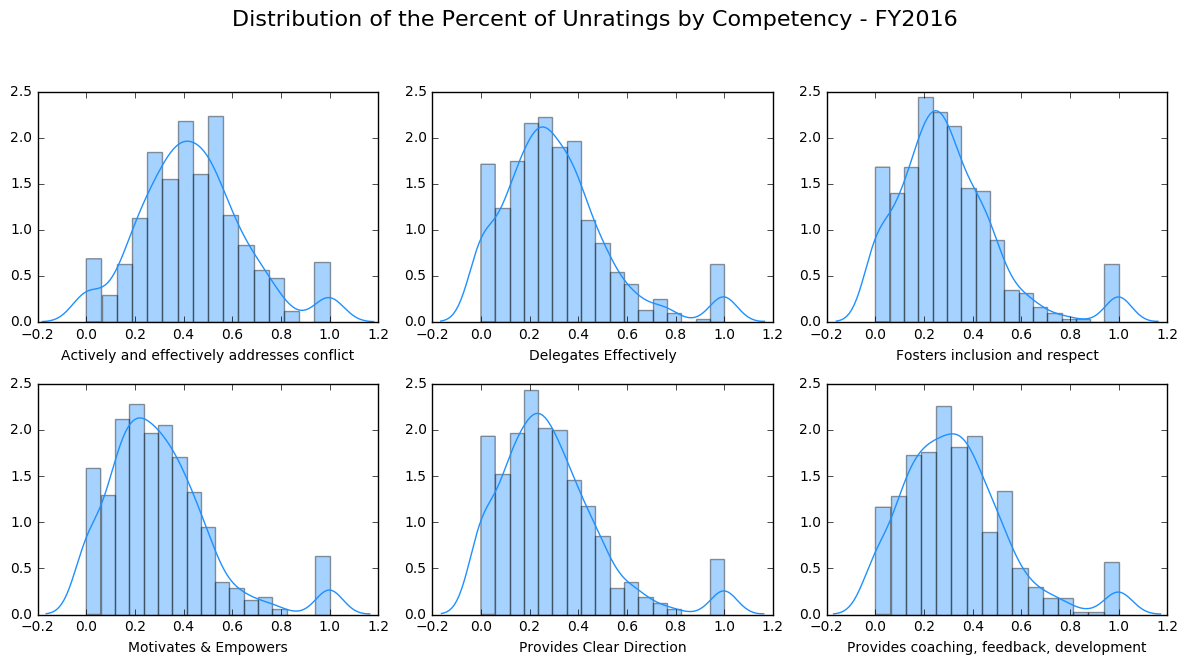

In [18]:
# Create histograms of unrated reponses by each competency for FY2016

fig = plt.figure(1)
plt.suptitle('Distribution of the Percent of Unratings by Competency - FY2016', y = 1.1, fontsize = 16)
plt.subplot(2,3,1)
sns.distplot(pivot2_unrated[pivot2_unrated.FY == 2016]['Actively and effectively addresses conflict'], color = 'dodgerblue')
plt.subplot(2,3,2)
sns.distplot(pivot2_unrated[pivot2_unrated.FY == 2016]['Delegates Effectively'], color = 'dodgerblue')
plt.subplot(2,3,3)
sns.distplot(pivot2_unrated[pivot2_unrated.FY == 2016]['Fosters inclusion and respect'], color = 'dodgerblue')
plt.subplot(2,3,4)
sns.distplot(pivot2_unrated[pivot2_unrated.FY == 2016]['Motivates & Empowers'], color = 'dodgerblue')
plt.subplot(2,3,5)
sns.distplot(pivot2_unrated[pivot2_unrated.FY == 2016]['Provides Clear Direction'], color = 'dodgerblue')
plt.subplot(2,3,6)
sns.distplot(pivot2_unrated[pivot2_unrated.FY == 2016]['Provides coaching, feedback, development'], color = 'dodgerblue')
fig.set_size_inches(w=12,h=6)
fig.tight_layout()

plt.show()

In [19]:
# Table for overall unrated vs. rated % for each individual
pivot3 = driall_raw.groupby(['ID',  'FY', 'Rated'])['Document ID'].count()
pivot3 = pivot3.groupby(level = [0, 1]).apply(lambda x: x/x.sum())

pivot3 = pivot3.unstack('Rated')
pivot3 = pivot3.reset_index()
pivot3.head()

Rated,ID,FY,Rated,Unrated
0,01568E,2016,0.775510,0.224490
1,01568E,2017,0.269841,0.730159
2,01608S,2016,0.723810,0.276190
3,01608S,2017,0.633929,0.366071
4,018569,2016,0.584416,0.415584


C:\Users\tle\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


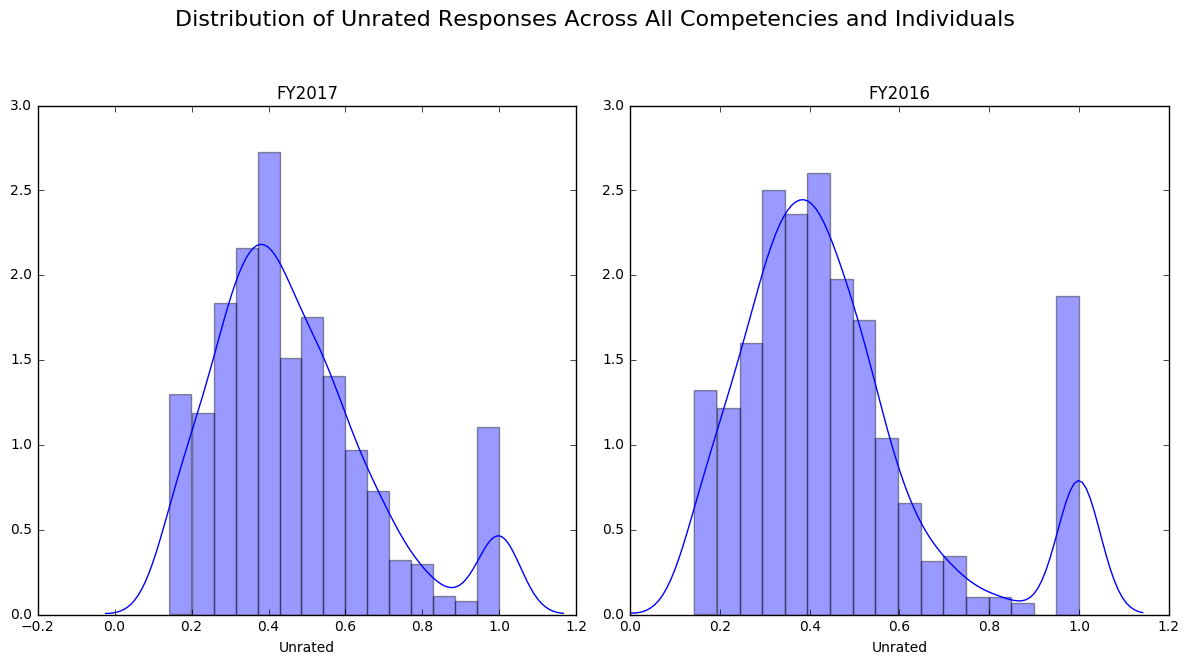

In [20]:
fig = plt.figure()

plt.subplot(1,2, 1)
sns.distplot(pivot3[pivot3.FY == 2017]['Unrated'])
plt.title('FY2017')

plt.subplot(1,2, 2)
sns.distplot(pivot3[pivot3.FY == 2016]['Unrated'])
plt.title('FY2016')

fig.set_size_inches(w=12,h=6)
fig.tight_layout()
plt.suptitle('Distribution of Unrated Responses Across All Competencies and Individuals', y = 1.1, fontsize = 16)
plt.show()

In [21]:
# Summary table of Unrated vs. Rated by each competency
pivot4 = driall_raw.groupby(['FY', 'Competency Name', 'Rated'])['Document ID'].count()
pivot4 = pivot4.groupby(level = [0,1]).apply(lambda x: x*100/x.sum())


pivot4 = pivot4.unstack('FY')
pivot4 = pivot4.unstack('Rated')
pivot4 = pivot4.reset_index()
pivot4 = pivot4.drop([4])
pivot4 = pivot4.round(1)
pivot4

FY                                 Competency Name  2016          2017        
Rated                                              Rated Unrated Rated Unrated
0      Actively and effectively addresses conflict  54.5    45.5  53.0    47.0
1                            Delegates Effectively  66.8    33.2  65.3    34.7
2                    Fosters inclusion and respect  68.3    31.7  66.6    33.4
3                             Motivates & Empowers  68.0    32.0  66.2    33.8
5                         Provides Clear Direction  69.2    30.8  67.3    32.7
6         Provides coaching, feedback, development  64.6    35.4  63.0    37.0

In [22]:
# Empinfo
#empinfo17 = empinfo.loc[empinfo.FY == 2017]

# Clean EmpIDs
empinfo['Emplid'] = empinfo['Emplid'].astype(str)
empinfo['Emplid']= empinfo['Emplid'].str.strip()
empinfo['Emplid'] = empinfo['Emplid'].str.pad(6, fillchar = '0')

pivot3['ID'] = pivot3['ID'].astype(str)
pivot3['ID'] = pivot3['ID'].str.strip()
pivot3['ID'] = pivot3['ID'].str.pad(6, fillchar = '0')

# Merge dri and empinfo17
empinfo_dri = pd.merge(pivot3, empinfo,how = 'left', left_on = ["ID", 'FY'], right_on = ['Emplid', 'FY'])

# Add Grade Level and Career Stream
empinfo_dri['Grade Level'] = np.where(empinfo_dri['Grade Group'] == 'B1-B5', 'B-level', 'A-level')
empinfo_dri['Career Stream'] = np.where(empinfo_dri['Incumbent Type'].isin(['Fungible Macroeconomist', 'Specialist']),
                                         'Economist', 'Specialized Career Stream')

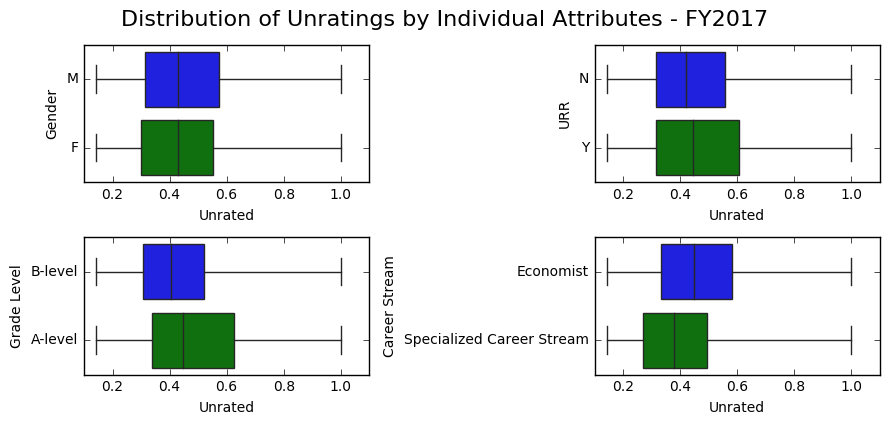

In [23]:
# Plot Unrating responses by individual attributes
fig = plt.figure(1)
plt.suptitle('Distribution of Unratings by Individual Attributes - FY2017', y = 1.05, fontsize = 16)
plt.subplot(2,2,1)
sns.boxplot(data = empinfo_dri[empinfo_dri.FY == 2017], x = 'Unrated', y = 'Gender',whis = 1.8)
plt.xlim(0.1, 1.1)
plt.subplot(2,2,2)
sns.boxplot(data = empinfo_dri[empinfo_dri.FY == 2017], x = 'Unrated', y = 'URR',whis = 1.85)
plt.xlim(0.1, 1.1)
plt.subplot(2,2,3)
sns.boxplot(data = empinfo_dri[empinfo_dri.FY == 2017], x = 'Unrated', y = 'Grade Level',whis = 2.5)
plt.xlim(0.1, 1.1)
plt.subplot(2,2,4)
sns.boxplot(data = empinfo_dri[empinfo_dri.FY == 2017], x = 'Unrated', y = 'Career Stream',whis = 2.5)
plt.xlim(0.1, 1.1)

fig.set_size_inches(w=9,h=4)
fig.tight_layout()

plt.show()

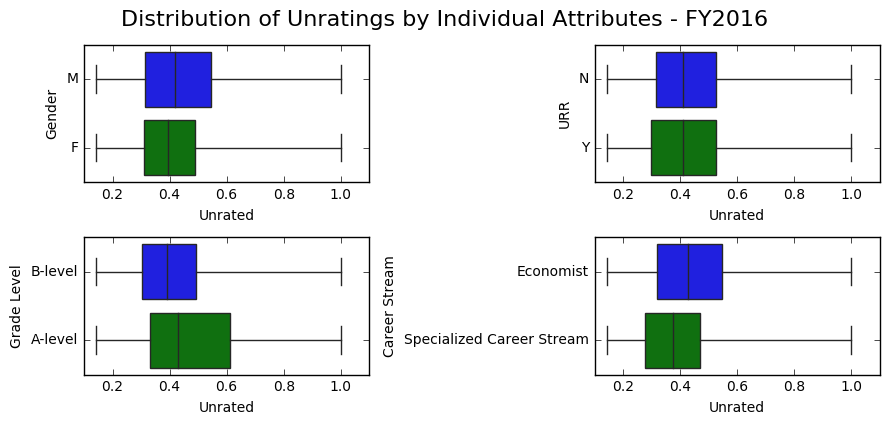

In [24]:
# Plot Unrating responses by individual attributes - FY2016
fig = plt.figure(1)
plt.suptitle('Distribution of Unratings by Individual Attributes - FY2016', y = 1.05, fontsize = 16)
plt.subplot(2,2,1)
sns.boxplot(data = empinfo_dri[empinfo_dri.FY == 2016], x = 'Unrated', y = 'Gender',whis = 3)
plt.xlim(0.1, 1.1)
plt.subplot(2,2,2)
sns.boxplot(data = empinfo_dri[empinfo_dri.FY == 2016], x = 'Unrated', y = 'URR',whis = 3)
plt.xlim(0.1, 1.1)
plt.subplot(2,2,3)
sns.boxplot(data = empinfo_dri[empinfo_dri.FY == 2016], x = 'Unrated', y = 'Grade Level',whis = 3)
plt.xlim(0.1, 1.1)
plt.subplot(2,2,4)
sns.boxplot(data = empinfo_dri[empinfo_dri.FY == 2016], x = 'Unrated', y = 'Career Stream',whis = 3)
plt.xlim(0.1, 1.1)

fig.set_size_inches(w=9,h=4)
fig.tight_layout()

plt.show()

In [25]:
# Create new Competency Rating column in DRI
driall_raw['Competency Rating Final'] = np.where(driall_raw['Competency Rating'].isin(['Too New To Rate', 
                                                                                             'Unrated']),
                                                   np.NaN,driall_raw['Competency Rating'])
dri_nonan = driall_raw[driall_raw['Competency Rating Final'].notnull()]
dri_nonan['Competency Rating Final'] = dri_nonan['Competency Rating Final'].astype(int)
dri_nonan.head()

C:\Users\tle\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Status,Document ID,Form Title,Subject Name,Subject Department,Subject Department/Division,Subject Grade,Subject Title,Subject Career Stream,Form Template Name,...,Rater Feedback Status,Competency Name,Competency Rating,Competency Rating Description,Competency Comment,FY,Rated,ID,Preferred Name,Competency Rating Final
0,Signoff Stage,43612,2017 Direct Report Input Primary Manager for J...,"Dauphin,Jean-Francois",MCD,MCDDE,B02,Division Chief,Economist,2017 Direct Report Input Primary Manager,...,Completed,Actively and effectively addresses conflict,2,Meets Expectation,NaN,2017,Rated,708909,"Dauphin,Jean-Francois",2
1,Signoff Stage,39370,2017 Direct Report Input Matrix Managers for A...,"Tieman,Alexander Ferenc",FAD,FADF2,A15,Deputy Division Chief,Economist,2017 Direct Report Input Matrix Managers,...,Completed,Actively and effectively addresses conflict,1,More Than Expected,NaN,2017,Rated,711478,"Tieman,Alexander Ferenc",1
2,Signoff Stage,39479,2017 Direct Report Input Matrix Managers for I...,"Petrova,Iva Krasteva",EUR,EURS4,A15,Deputy Chief,Economist,2017 Direct Report Input Matrix Managers,...,Completed,Actively and effectively addresses conflict,2,Meets Expectation,NaN,2017,Rated,714717,"Petrova,Iva Krasteva",2
3,Signoff Stage,39730,2017 Direct Report Input B4 & B5 Managers for ...,"Gupta,Sanjeev",FAD,FADAI,B04,Deputy Director,Economist,2017 Direct Report Input B4 & B5 Managers,...,Completed,Actively and effectively addresses conflict,2,Meets Expectation,NaN,2017,Rated,182640,"Gupta,Sanjeev",2
5,Signoff Stage,39810,2017 Direct Report Input Primary Manager for H...,"Berger,Helge",RES,RESMS,B02,Division Chief,Economist,2017 Direct Report Input Primary Manager,...,Completed,Actively and effectively addresses conflict,2,Meets Expectation,NaN,2017,Rated,710761,"Berger,Helge",2


In [26]:
# Calculate mean dri for each person
dri_mean = pd.pivot_table(dri_nonan, index = ['ID', 'FY'], values = 'Competency Rating Final', aggfunc = 'mean')
dri_mean = pd.DataFrame(dri_mean).reset_index()
dri_mean.columns = ['ID', 'FY', 'Mean Rating']
#dri_mean = round(dri_mean, 1)

# Median DRI for each person
dri_med = pd.pivot_table(dri_nonan, index = ['ID', 'FY'], values = 'Competency Rating Final', aggfunc = 'median')
dri_med = pd.DataFrame(dri_med).reset_index()
dri_med.columns = ['ID','FY','Median Rating']

In [27]:
dri_mean.head()

,ID,FY,Mean Rating
0,01568E,2016,1.236842
1,01568E,2017,1.294118
2,01608S,2016,1.223684
3,01608S,2017,1.140845
4,018569,2016,1.888889


In [28]:
# Merge dri_mean and dri_med with empinfo_dri
empinfo_dri = pd.merge(empinfo_dri, dri_mean, how = 'left', on = ['ID', 'FY'])
empinfo_dri = pd.merge(empinfo_dri, dri_med, how = 'left', on = ['ID', 'FY'])

In [29]:
empinfo_dri.head()

Rated,ID,FY,Rated,Unrated,Emplid,Name,Gender,Nationality,Dept ID,Job Title,...,Ind/Dev,Salary,Total Fund Yrs of Service,Yrs of service,Diversity Region,URR,Grade Level,Career Stream,Mean Rating,Median Rating
0,01568E,2016,0.775510,0.224490,01568E,"Aitken,Brian J.",M,U.S.,APD,Advisor (Area),...,I,221560.0,23.53,23.53,U.S. & Canada,N,B-level,Economist,1.236842,1.0
1,01568E,2017,0.269841,0.730159,01568E,"Aitken,Brian J.",M,U.S.,APD,Division Chief (Area),...,I,229100.0,24.53,24.53,U.S. & Canada,N,B-level,Economist,1.294118,1.0
2,01608S,2016,0.723810,0.276190,01608S,"Al-Atrash,Hassan M.",M,Syr Arb Rep,SEC,Division Chief,...,D,250240.0,25.76,25.58,Middle East & North Africa+ (MENA+),Y,B-level,Economist,1.223684,1.0
3,01608S,2017,0.633929,0.366071,01608S,"Al-Atrash,Hassan M.",M,Syr Arb Rep,SEC,Assistant Director,...,D,269940.0,26.76,26.58,Middle East & North Africa+ (MENA+),Y,B-level,Economist,1.140845,1.0
4,018569,2016,0.584416,0.415584,018569,"Almekinders,Gerard J.",M,Netherlands,APD,Deputy Division Chief (Area),...,I,206850.0,21.5,21.50,Europe (excl. Transition Countries),N,A-level,Economist,1.888889,2.0


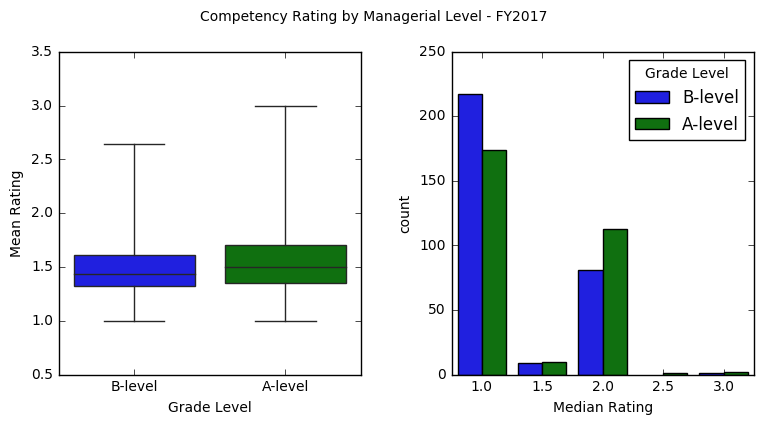

In [30]:
# Mean Rating by Grade level
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.suptitle('Competency Rating by Managerial Level - FY2017', y = 1.05)
sns.boxplot(data = empinfo_dri[empinfo_dri.FY == 2017], y = 'Mean Rating', x = 'Grade Level', whis = 5)
axes = plt.gca()
axes.set_ylim([0.5,3.5])
plt.subplot(1, 2, 2)
sns.countplot(data = empinfo_dri[empinfo_dri.FY == 2017], hue = 'Grade Level', x = 'Median Rating', orient = 'v')
plt.tight_layout()
fig.set_size_inches(w=8,h=4)
plt.show()

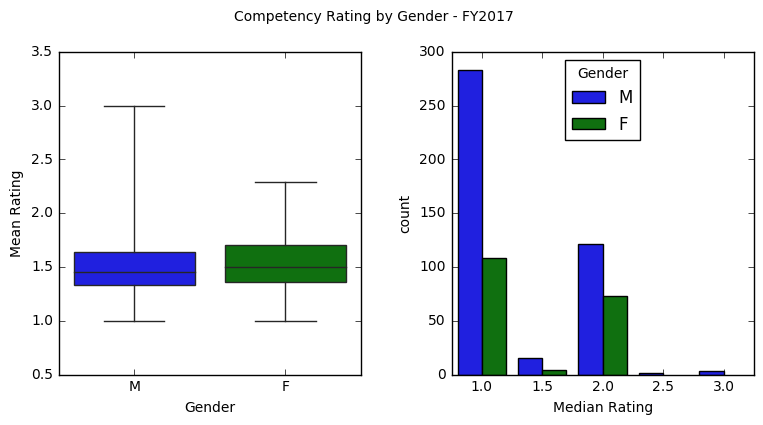

In [31]:
# Rating by Gender
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.suptitle('Competency Rating by Gender - FY2017', y = 1.05)
sns.boxplot(data = empinfo_dri[empinfo_dri.FY == 2017], y = 'Mean Rating', x = 'Gender', whis = 5)
axes = plt.gca()
axes.set_ylim([0.5,3.5])
plt.subplot(1, 2, 2)
sns.countplot(data = empinfo_dri[empinfo_dri.FY == 2017], hue = 'Gender', x = 'Median Rating', orient = 'v')
plt.tight_layout()
fig.set_size_inches(w=8,h=4)
plt.show()

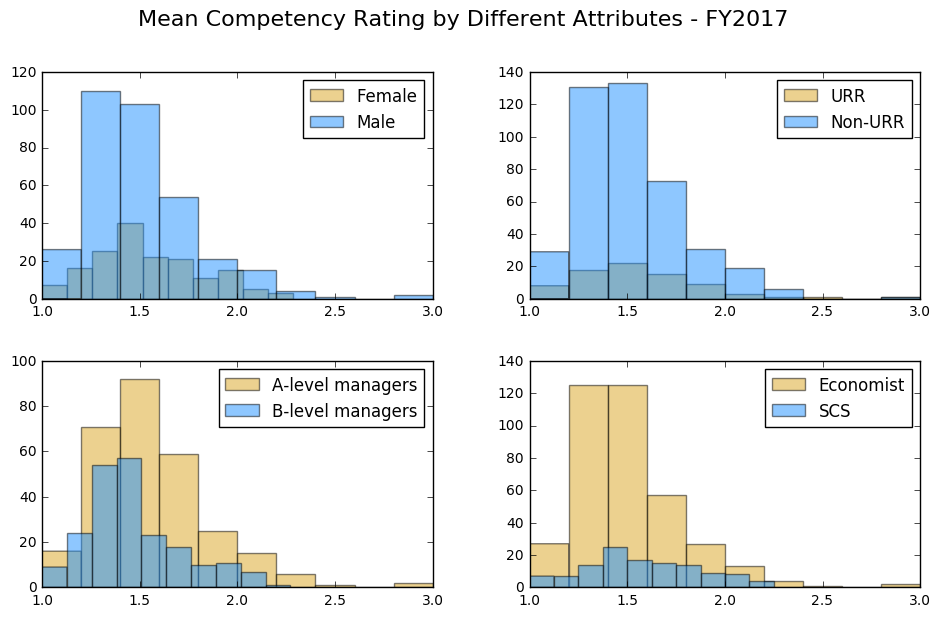

In [32]:
# Plot mean ratings by different individual attributes FY17
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.hist(empinfo_dri[(empinfo_dri.FY == 2017) & (empinfo_dri.Gender == 'F')].dropna()['Mean Rating'], alpha = 0.5, label = 'Female', color = 'goldenrod' )
plt.hist(empinfo_dri[(empinfo_dri.FY == 2017) & (empinfo_dri.Gender == 'M')].dropna()['Mean Rating'], alpha = 0.5, label = 'Male', color = 'dodgerblue')
plt.legend(loc = 'upper right')

plt.subplot(2, 2, 2)
plt.hist(empinfo_dri[(empinfo_dri.FY == 2017) & (empinfo_dri.URR == 'Y')].dropna()['Mean Rating'], alpha = 0.5, label = 'URR', color = 'goldenrod')
plt.hist(empinfo_dri[(empinfo_dri.FY == 2017) & (empinfo_dri.URR == 'N')].dropna()['Mean Rating'], alpha = 0.5, label = 'Non-URR', color = 'dodgerblue')
plt.legend(loc = 'upper right')

plt.subplot(2, 2, 3)
plt.hist(empinfo_dri[(empinfo_dri.FY == 2017) & (empinfo_dri['Grade Level'] == 'A-level')].dropna()['Mean Rating'], alpha = 0.5, label = 'A-level managers', color = 'goldenrod')
plt.hist(empinfo_dri[(empinfo_dri.FY == 2017) & (empinfo_dri['Grade Level'] == 'B-level')].dropna()['Mean Rating'], alpha = 0.5, label = 'B-level managers', color = 'dodgerblue')
plt.legend(loc = 'upper right')

plt.subplot(2, 2, 4)
plt.hist(empinfo_dri[(empinfo_dri.FY == 2017) & (empinfo_dri['Career Stream'] == 'Economist')].dropna()['Mean Rating'], alpha = 0.5, label = 'Economist', color = 'goldenrod')
plt.hist(empinfo_dri[(empinfo_dri.FY == 2017) & (empinfo_dri['Career Stream'] == 'Specialized Career Stream')].dropna()['Mean Rating'], alpha = 0.5, label = 'SCS', color = 'dodgerblue')
plt.legend(loc = 'upper right')


plt.suptitle('Mean Competency Rating by Different Attributes - FY2017', y = 1.05, fontsize = 16)
plt.tight_layout()
fig.set_size_inches(w=10,h=6)
plt.show()



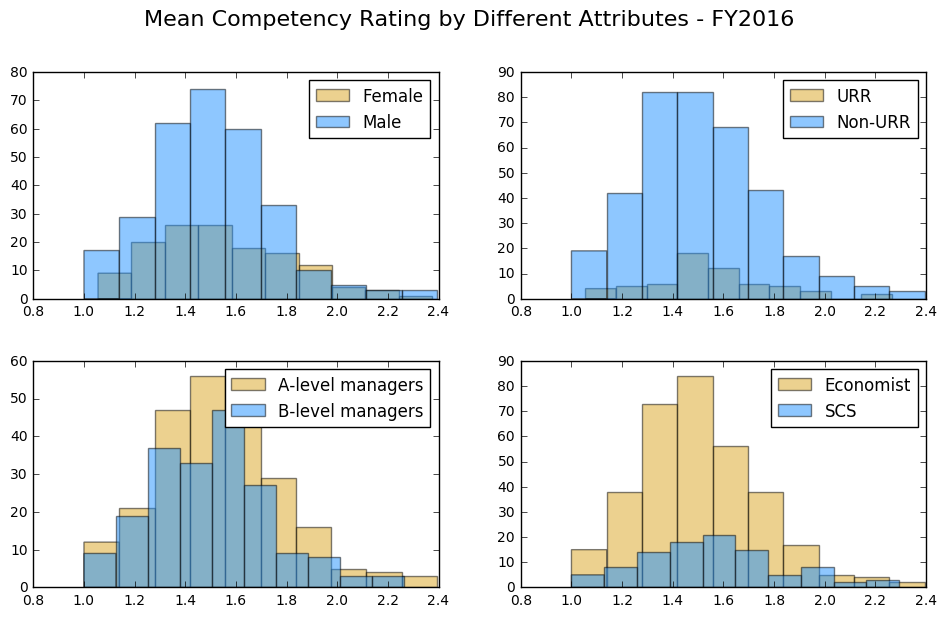

In [33]:
# Plot mean ratings by different individual attributes FY16
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.hist(empinfo_dri[(empinfo_dri.FY == 2016) & (empinfo_dri.Gender == 'F')].dropna()['Mean Rating'], alpha = 0.5, label = 'Female', color = 'goldenrod' )
plt.hist(empinfo_dri[(empinfo_dri.FY == 2016) & (empinfo_dri.Gender == 'M')].dropna()['Mean Rating'], alpha = 0.5, label = 'Male', color = 'dodgerblue')
plt.legend(loc = 'upper right')

plt.subplot(2, 2, 2)
plt.hist(empinfo_dri[(empinfo_dri.FY == 2016) & (empinfo_dri.URR == 'Y')].dropna()['Mean Rating'], alpha = 0.5, label = 'URR', color = 'goldenrod')
plt.hist(empinfo_dri[(empinfo_dri.FY == 2016) & (empinfo_dri.URR == 'N')].dropna()['Mean Rating'], alpha = 0.5, label = 'Non-URR', color = 'dodgerblue')
plt.legend(loc = 'upper right')

plt.subplot(2, 2, 3)
plt.hist(empinfo_dri[(empinfo_dri.FY == 2016) & (empinfo_dri['Grade Level'] == 'A-level')].dropna()['Mean Rating'], alpha = 0.5, label = 'A-level managers', color = 'goldenrod')
plt.hist(empinfo_dri[(empinfo_dri.FY == 2016) & (empinfo_dri['Grade Level'] == 'B-level')].dropna()['Mean Rating'], alpha = 0.5, label = 'B-level managers', color = 'dodgerblue')
plt.legend(loc = 'upper right')

plt.subplot(2, 2, 4)
plt.hist(empinfo_dri[(empinfo_dri.FY == 2016) & (empinfo_dri['Career Stream'] == 'Economist')].dropna()['Mean Rating'], alpha = 0.5, label = 'Economist', color = 'goldenrod')
plt.hist(empinfo_dri[(empinfo_dri.FY == 2016) & (empinfo_dri['Career Stream'] == 'Specialized Career Stream')].dropna()['Mean Rating'], alpha = 0.5, label = 'SCS', color = 'dodgerblue')
plt.legend(loc = 'upper right')


plt.suptitle('Mean Competency Rating by Different Attributes - FY2016', y = 1.05, fontsize = 16)
plt.tight_layout()
fig.set_size_inches(w=10,h=6)
plt.show()



In [34]:
# Median and mean of each competency
med = dri_nonan.groupby(['FY', 'Competency Name'])['Competency Rating Final'].median()
med = pd.DataFrame(med).reset_index()
mean = dri_nonan.groupby(['FY','Competency Name'])['Competency Rating Final'].mean()
mean = pd.DataFrame(mean).reset_index()
mean_med = pd.merge(med, mean, how = 'left', on = ['FY','Competency Name'])
mean_med.columns = ['FY', 'Competency Name', 'Median', 'Mean']
#mean_med = mean_med.unstack('FY')
mean_med

,FY,Competency Name,Median,Mean
0,2016,Actively and effectively addresses conflict,2,1.623030
1,2016,Delegates Effectively,1,1.542709
2,2016,Fosters inclusion and respect,1,1.439063
3,2016,Motivates & Empowers,1,1.549236
4,2016,Provides Clear Direction,1,1.530000
5,2016,"Provides coaching, feedback, development",1,1.602403
6,2017,Actively and effectively addresses conflict,2,1.601043
7,2017,Delegates Effectively,1,1.531156
8,2017,Fosters inclusion and respect,1,1.417531
9,2017,Motivates & Empowers,1,1.504876


C:\Users\tle\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


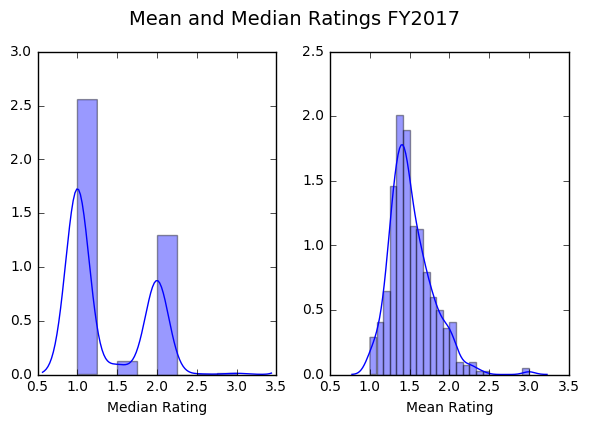

In [35]:
# Compare Mean and Median Ratings
fig = plt.figure()
plt.subplot(1,2,1)
sns.distplot(empinfo_dri[empinfo_dri.FY == 2017].dropna()['Median Rating'])
plt.subplot(1,2,2)
sns.distplot(empinfo_dri[empinfo_dri.FY == 2017].dropna()['Mean Rating'])
plt.suptitle('Mean and Median Ratings FY2017',  y = 1.05, fontsize = 14)
fig.set_size_inches(w = 6, h = 4)
fig.tight_layout()
plt.show()

C:\Users\tle\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


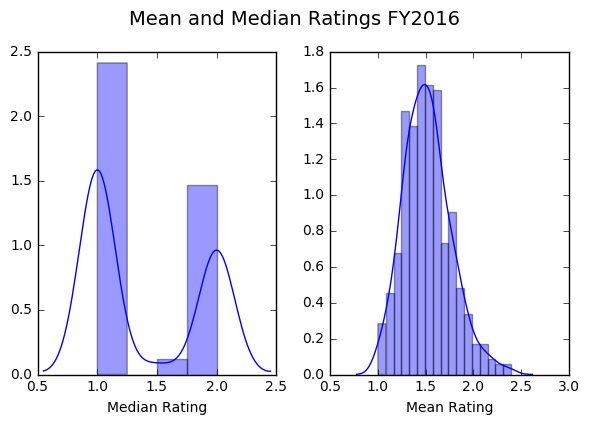

In [36]:
fig = plt.figure()
plt.subplot(1,2,1)
sns.distplot(empinfo_dri[empinfo_dri.FY == 2016].dropna()['Median Rating'])
plt.subplot(1,2,2)
sns.distplot(empinfo_dri[empinfo_dri.FY == 2016].dropna()['Mean Rating'])
plt.suptitle('Mean and Median Ratings FY2016', y = 1.05,fontsize = 14)
fig.set_size_inches(w = 6, h = 4)
fig.tight_layout()
plt.show()

In [37]:
# Mean rating for each person and by competency
mean_table = pd.pivot_table(data = dri_nonan, index = ['FY', 'Subject Name'], columns = 'Competency Name', aggfunc = 'mean', 
               values = 'Competency Rating Final' )
#mean_table = mean_table.fillna(0)
mean_table = mean_table.reset_index()
mean_table_melt = pd.melt(mean_table, id_vars = ['FY', 'Subject Name'], value_vars = ['Actively and effectively addresses conflict',
            'Delegates Effectively', 'Fosters inclusion and respect', 'Motivates & Empowers', 'Provides Clear Direction',
            'Provides coaching, feedback, development'], value_name = 'Competency')

mean_table_melt.head()

,FY,Subject Name,Competency Name,Competency
0,2016,"Abbas,S M Ali",Actively and effectively addresses conflict,1.625
1,2016,"Adenauer,Isabell",Actively and effectively addresses conflict,2.000
2,2016,"Adler,Gustavo",Actively and effectively addresses conflict,1.500
3,2016,"Aitken,Brian J.",Actively and effectively addresses conflict,1.000
4,2016,"Aiyar,Shekhar Shankar",Actively and effectively addresses conflict,1.500


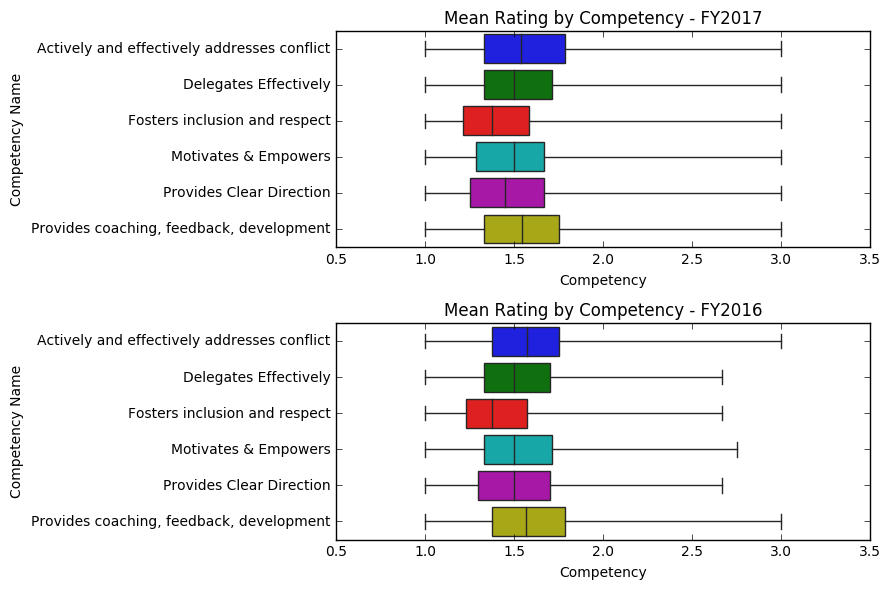

In [38]:
%matplotlib inline
# Plot Mean Ratings distribution by competecy
fig = plt.figure()
plt.subplot(2,1,1)
sns.boxplot(data = mean_table_melt[mean_table_melt.FY == 2017].dropna(), x = 'Competency', y = 'Competency Name', whis = 4)
fig.set_size_inches(w=7,h=4)
plt.xlim(0.5, 3.5)
plt.title('Mean Rating by Competency - FY2017')

plt.subplot(2,1,2)
sns.boxplot(data = mean_table_melt[mean_table_melt.FY == 2016].dropna(), x = 'Competency', y = 'Competency Name', whis = 4)
fig.set_size_inches(w=7,h=4)
plt.xlim(0.5, 3.5)
plt.title('Mean Rating by Competency - FY2016')

fig.set_size_inches(w=9,h=6)
fig.tight_layout()
plt.show()

In [39]:
# Import other datasets
training_all = pd.read_excel('Training data 2015-2017.xlsx')
leave_all = pd.read_excel('Leave Data 2008-2017.xlsx')
traces_all = pd.read_excel('Traces_3years_byFY.xlsx')

In [40]:
# Clean Emplid
training_all['Emplid'] = training_all['Emplid'].astype(str)
training_all['Emplid'] = training_all['Emplid'].str.strip()
training_all['Emplid'] = training_all['Emplid'].str.pad(6, fillchar = '0')

leave_all['Empl ID'] = leave_all['Empl ID'].astype(str)
leave_all['Empl ID'] = leave_all['Empl ID'].str.strip()
leave_all['Empl ID'] = leave_all['Empl ID'].str.pad(6, fillchar = '0')

traces_all['EMPID'] = traces_all['EMPID'].astype(str)
traces_all['EMPID'] = traces_all['EMPID'].str.strip()
traces_all['EMPID'] = traces_all['EMPID'].str.pad(6, fillchar = '0')


In [41]:
# Calculate leave days
leave_all['Annual Leave Used (Days)'] = leave_all.IMF_LEAVE_ANN_USED/8
leave_all['Annual Leave Lost (Days)'] = leave_all.IMF_LEAVE_ANN_LOST/8

# Filter only columns of interest
training_all = training_all[['Emplid', 'FY', 'Total Training']]
leave_all = leave_all[['Empl ID', 'FY', 'Annual Leave Used (Days)', 'Annual Leave Lost (Days)']]
traces_all = traces_all[['EMPID', 'FY', 'Total hours', 'Overtime hours']]

# Rename columns

leave_all.columns = ['Emplid', 'FY', 'Annual Leave Used (Days)', 'Annual Leave Lost (Days)']
traces_all.columns = ['Emplid', 'FY', 'Total hours', 'Overtime hours']

In [42]:
# Filter to select 2017 only
training_17 = training_all[training_all.FY == 2017]
leave_17 = leave_all[leave_all.FY == 2017]
traces_17 = traces_all[traces_all.FY == 2017]



In [43]:
# Merge leave, traces, and training with empinfo_dri17
empinfo_dri = pd.merge(empinfo_dri, training_all, how = 'left', on = ['Emplid', 'FY'])
empinfo_dri = pd.merge(empinfo_dri, traces_all, how = 'left', on = ['Emplid', 'FY'])
empinfo_dri = pd.merge(empinfo_dri, leave_all, how = 'left', on = ['Emplid', 'FY'])
empinfo_dri.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 0 to 1218
Data columns (total 40 columns):
ID                           1219 non-null object
FY                           1219 non-null int64
Rated                        1126 non-null float64
Unrated                      1219 non-null float64
Emplid                       1218 non-null object
Name                         1218 non-null object
Gender                       1218 non-null object
Nationality                  1218 non-null object
Dept ID                      1218 non-null object
Job Title                    1218 non-null object
Incumbent Type               1218 non-null object
Grade                        1218 non-null object
Employment Type              1218 non-null object
Position Level               1218 non-null object
2012 Rating                  1066 non-null object
2013 Rating                  1061 non-null object
2014 Rating                  1060 non-null object
2015 Rating                  1058 non-null

In [44]:
# Add log of mean rating
empinfo_dri['Mean Rating (log)'] = np.log(empinfo_dri['Mean Rating'])

In [45]:
# Export Empinfo_dri to Excel
empinfo_dri.to_excel('Empinfo_DRI_FY16&17.xlsx', index = None)

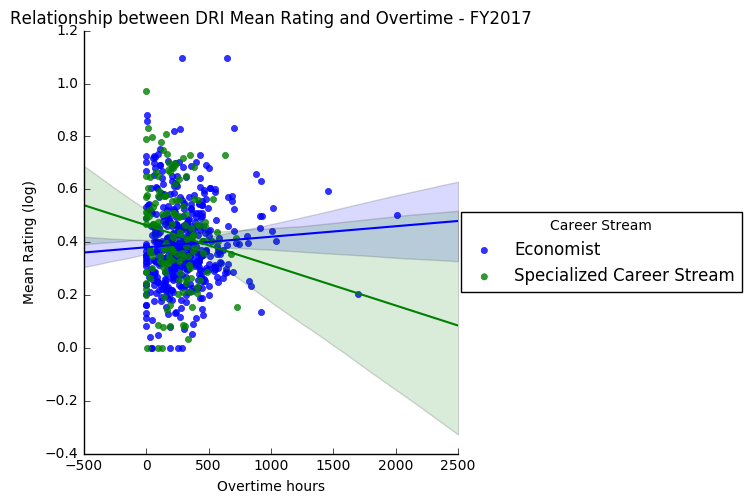

In [46]:
# Correlate DRI Mean rating and overtime
sns.lmplot(y = 'Mean Rating (log)', x = 'Overtime hours', hue = 'Career Stream', data = empinfo_dri[empinfo_dri.FY == 2017])
plt.title('Relationship between DRI Mean Rating and Overtime - FY2017')
plt.show()

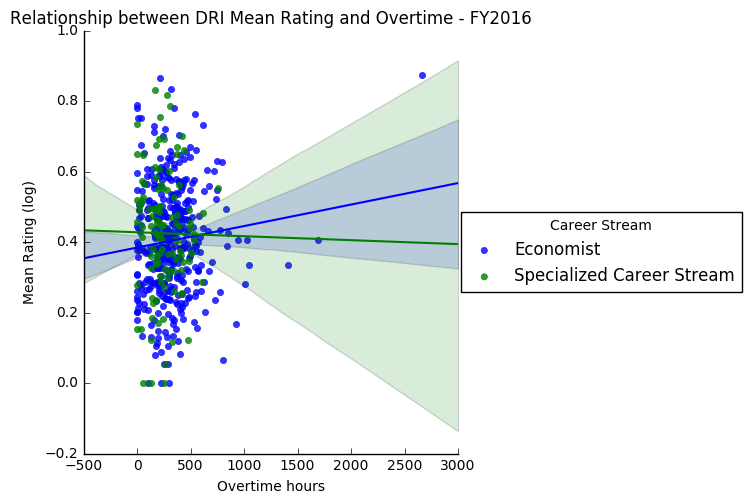

In [47]:
sns.lmplot(y = 'Mean Rating (log)', x = 'Overtime hours', hue = 'Career Stream', data = empinfo_dri[empinfo_dri.FY == 2016])
plt.title('Relationship between DRI Mean Rating and Overtime - FY2016')
plt.show()

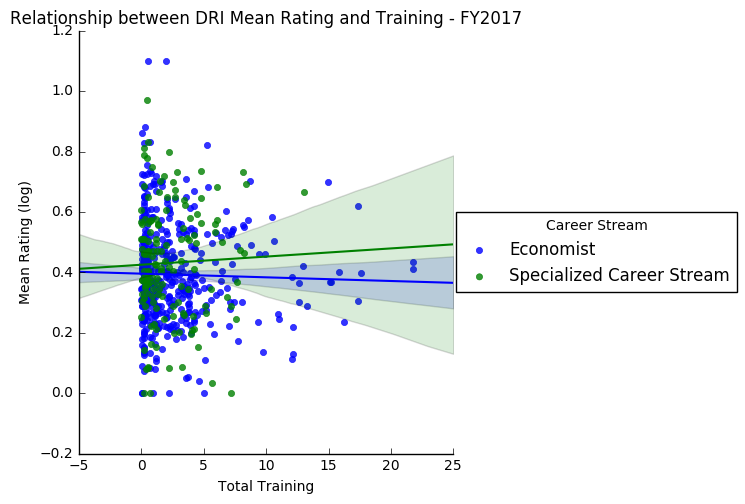

In [48]:
# Correlate DRI Mean rating and training
sns.lmplot(y = 'Mean Rating (log)', x = 'Total Training', hue = 'Career Stream', data = empinfo_dri[empinfo_dri.FY == 2017])
plt.title('Relationship between DRI Mean Rating and Training - FY2017')
plt.show()

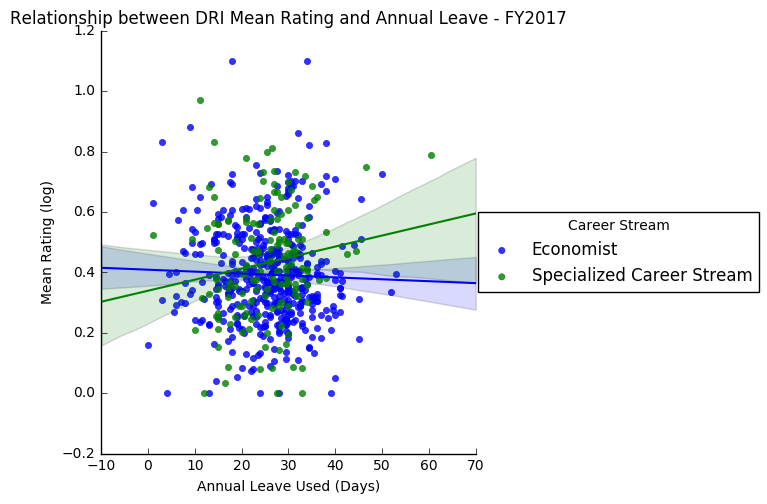

In [49]:
sns.lmplot(y = 'Mean Rating (log)', x = 'Annual Leave Used (Days)', hue = 'Career Stream', data = empinfo_dri[empinfo_dri.FY == 2017])
plt.title('Relationship between DRI Mean Rating and Annual Leave - FY2017')
plt.show()

In [50]:
mean_dri16 = empinfo_dri[empinfo_dri.FY == 2016][['Emplid', 'FY', 'Mean Rating']]
mean_dri17 = empinfo_dri[empinfo_dri.FY == 2017][['Emplid', 'FY', 'Mean Rating']]
mean_dri_scatter = pd.merge(mean_dri16, mean_dri17, how = 'inner', on = 'Emplid')
mean_dri_scatter = mean_dri_scatter.drop(['FY_x', 'FY_y'], axis = 1)
mean_dri_scatter.columns = ['Emplid', '2016 Mean', '2017 Mean']
mean_dri_scatter.head()

,Emplid,2016 Mean,2017 Mean
0,01568E,1.236842,1.294118
1,01608S,1.223684,1.140845
2,018569,1.888889,1.500000
3,018643,1.457944,1.338462
4,018747,1.471429,1.341463


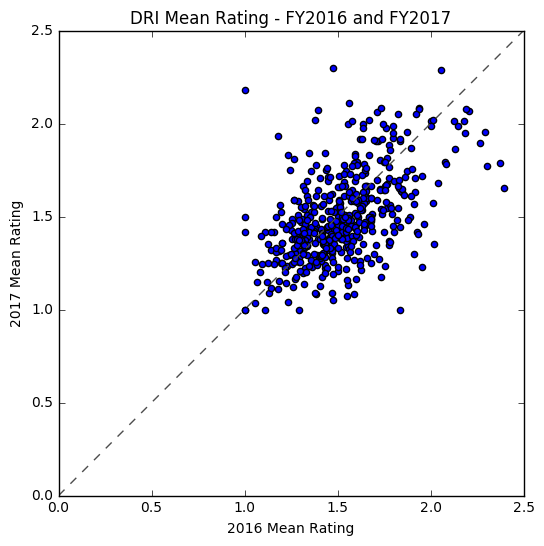

In [51]:
# Draw 45 degree plot
f, ax = plt.subplots(figsize=(6, 6))

ax.scatter(mean_dri_scatter['2016 Mean'], mean_dri_scatter['2017 Mean'])
ax.set(xlim=(0, 2.5), ylim=(0, 2.5))

diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

def on_change(axes):
    # When this function is called it checks the current
    # values of xlim and ylim and modifies diag_line
    # accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)

plt.xlabel('2016 Mean Rating')
plt.ylabel('2017 Mean Rating')
plt.title('DRI Mean Rating - FY2016 and FY2017')
plt.show()

In [53]:
# Median rating for each person and by competency
median_table = pd.pivot_table(data = dri_nonan, index = ['FY', 'Subject Name'], columns = 'Competency Name', 
                              aggfunc = 'median', 
               values = 'Competency Rating Final' )
#median_table = median_table.fillna(0)
median_table = median_table.reset_index()
##mean_table_melt = pd.melt(mean_table, id_vars = ['FY', 'Subject Name'], value_vars = ['Actively and effectively addresses conflict',
  #          'Delegates Effectively', 'Fosters inclusion and respect', 'Motivates & Empowers', 'Provides Clear Direction',
#         'Provides coaching, feedback, development'], value_name = 'Competency')

median_table.head()

Competency Name,FY,Subject Name,Actively and effectively addresses conflict,Delegates Effectively,Fosters inclusion and respect,Motivates & Empowers,Provides Clear Direction,"Provides coaching, feedback, development"
0,2016,"Abbas,S M Ali",2.0,2.0,1.0,2.0,2.0,1.5
1,2016,"Adenauer,Isabell",2.0,2.0,2.0,2.0,2.0,2.0
2,2016,"Adler,Gustavo",1.5,1.0,2.0,1.5,1.0,2.0
3,2016,"Aitken,Brian J.",1.0,1.0,1.0,1.0,2.0,1.0
4,2016,"Aiyar,Shekhar Shankar",1.5,2.0,2.0,2.0,2.0,2.0


In [ ]:
median_table.columns = ['FY', 'Subject Name', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6']
median_table['B1'] = np.

In [54]:
median_table.to_excel('Medin DRI by person and competency.xlsx', index = None)

In [69]:
#import statsmodels.api as sm
from statsmodels.formula.api import ols

data_for_reg = empinfo_dri[['Emplid', 'FY', 'Mean Rating', 'Overtime hours', 'Total Training', 
                            'Annual Leave Used (Days)']]
data_for_reg.columns = ['Emplid', 'FY', 'Mean_Rating', 'Overtime_hours', 'Total_Training', 
                            'Annual_Leave_Used_(Days)']

data_for_reg = data_for_reg.dropna()
data_for_reg['Mean_Rating_log'] = np.log(data_for_reg['Mean_Rating'])

In [70]:
# OLS regression of Overtime and Mean Rating
m1 = ols('Mean_Rating_log ~ Overtime_hours ', data_for_reg[data_for_reg.FY == 2017]).fit()
print (m1.summary())

                            OLS Regression Results                            
Dep. Variable:        Mean_Rating_log   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.007713
Date:                Thu, 21 Sep 2017   Prob (F-statistic):              0.930
Time:                        11:08:15   Log-Likelihood:                 208.36
No. Observations:                 599   AIC:                            -412.7
Df Residuals:                     597   BIC:                            -403.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.4006      0.011     35.

In [71]:
import statsmodels.api as sm
# MEdian quantile
est = sm.QuantReg(data_for_reg[data_for_reg.FY == 2017]['Mean_Rating_log'].astype(float), 
                  data_for_reg[data_for_reg.FY == 2017]['Overtime_hours'].astype(float)).fit(q = 0.5)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:        Mean_Rating_log   Pseudo R-squared:              -0.7635
Model:                       QuantReg   Bandwidth:                      0.1002
Method:                 Least Squares   Sparsity:                       0.7762
Date:                Thu, 21 Sep 2017   No. Observations:                  599
Time:                        11:08:18   Df Residuals:                      598
                                        Df Model:                            1
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Overtime_hours     0.0010   4.42e-05     21.883      0.000         0.001     0.001
==================================================================================
"""

In [72]:
# 75th quantile
est = sm.QuantReg(data_for_reg[data_for_reg.FY == 2017]['Mean_Rating_log'].astype(float), 
                  data_for_reg[data_for_reg.FY == 2017]['Overtime_hours'].astype(float)).fit(q = 0.75)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:        Mean_Rating_log   Pseudo R-squared:               -1.317
Model:                       QuantReg   Bandwidth:                     0.08768
Method:                 Least Squares   Sparsity:                       0.7780
Date:                Thu, 21 Sep 2017   No. Observations:                  599
Time:                        11:08:18   Df Residuals:                      598
                                        Df Model:                            1
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Overtime_hours     0.0015   3.12e-05     47.313      0.000         0.001     0.002
==================================================================================
"""

In [73]:
est = sm.QuantReg(data_for_reg[data_for_reg.FY == 2017]['Mean_Rating_log'].astype(float), 
                  data_for_reg[data_for_reg.FY == 2017]['Overtime_hours'].astype(float)).fit(q = 0.95)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:        Mean_Rating_log   Pseudo R-squared:               -3.792
Model:                       QuantReg   Bandwidth:                     0.08967
Method:                 Least Squares   Sparsity:                        2.098
Date:                Thu, 21 Sep 2017   No. Observations:                  599
Time:                        11:08:20   Df Residuals:                      598
                                        Df Model:                            1
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Overtime_hours     0.0033   2.84e-05    114.683      0.000         0.003     0.003
==================================================================================
"""

In [30]:
# Create dataframe for PCA
#X = mean_table.iloc[:,1:]

In [74]:
X = pd.read_excel('Data for PCA.xlsx')
X.head()

,Actively and effectively addresses conflict,Delegates Effectively,Fosters inclusion and respect,Motivates & Empowers,Provides Clear Direction,"Provides coaching, feedback, development"
0,1.133333,1.772727,1.250000,1.434783,1.608696,1.590909
1,1.857143,1.428571,1.571429,1.428571,1.250000,1.428571
2,1.666667,1.636364,1.600000,1.909091,1.500000,2.000000
3,1.500000,1.750000,1.384615,1.416667,1.750000,1.727273
4,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000


In [75]:
len(X)

608

In [76]:
# Initialize a PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(X)

# Calculate explained variance 
var = pca.explained_variance_

var_df = pd.DataFrame(var, columns = ['Variance Explained'])
var_df['PCA number'] = range(1, len(var_df)+1)

var_df
#var

,Variance Explained,PCA number
0,0.441014,1
1,0.076741,2
2,0.061719,3
3,0.048250,4
4,0.030039,5
5,0.029411,6


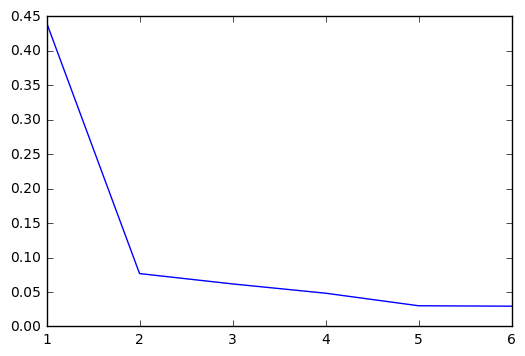

In [77]:
plt.plot(var_df['PCA number'], var_df['Variance Explained'])
plt.show()

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
mean_table_pca = mean_table
#mean_table_pca['x']= pca.fit_transform(X)[:,0]   # First principal component: x
#mean_table_pca['y'] = pca.fit_transform(X)[:,1]   # Second princial component: y
mean_table_pca.head()
#kmeans_customer_cluster = df[['customer_name', 'kmeans cluster', 'x', 'y' ]]  #Create a dataframe
#kmeans_customer_cluster.head()

Competency Name,FY,Subject Name,Actively and effectively addresses conflict,Delegates Effectively,Fosters inclusion and respect,Motivates & Empowers,Provides Clear Direction,"Provides coaching, feedback, development"
0,2016,"Abbas,S M Ali",1.625,1.884615,1.500000,1.760000,1.640000,1.625000
1,2016,"Adenauer,Isabell",2.000,2.200000,1.692308,1.909091,2.076923,2.000000
2,2016,"Adler,Gustavo",1.500,1.400000,1.800000,1.700000,1.363636,2.000000
3,2016,"Aitken,Brian J.",1.000,1.285714,1.142857,1.000000,1.571429,1.333333
4,2016,"Aiyar,Shekhar Shankar",1.500,1.615385,1.750000,1.900000,1.583333,1.727273


In [80]:
len(mean_table_pca)

1126

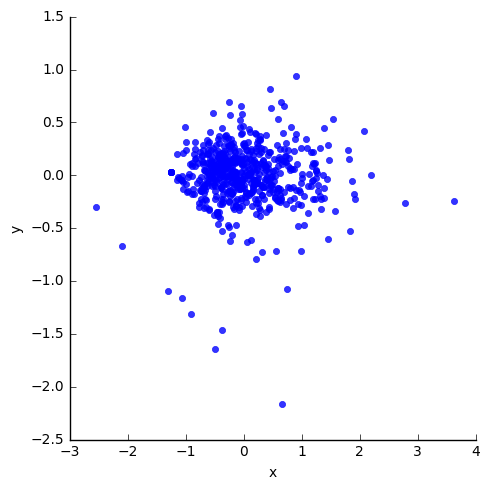

In [74]:
sns.lmplot(data=mean_table_pca, x='x', y='y', size=5, fit_reg=False)
plt.show()

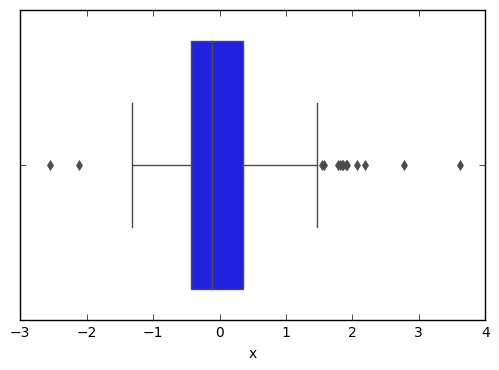

In [75]:
sns.boxplot(mean_table_pca.x)
plt.show()

In [83]:
# Prepare data for pairplot
mean_table_pca_short = mean_table_pca.drop(['Subject Name', 'FY'], axis = 1)
mean_table_pca_short.head()

Competency Name,Actively and effectively addresses conflict,Delegates Effectively,Fosters inclusion and respect,Motivates & Empowers,Provides Clear Direction,"Provides coaching, feedback, development"
0,1.625,1.884615,1.500000,1.760000,1.640000,1.625000
1,2.000,2.200000,1.692308,1.909091,2.076923,2.000000
2,1.500,1.400000,1.800000,1.700000,1.363636,2.000000
3,1.000,1.285714,1.142857,1.000000,1.571429,1.333333
4,1.500,1.615385,1.750000,1.900000,1.583333,1.727273


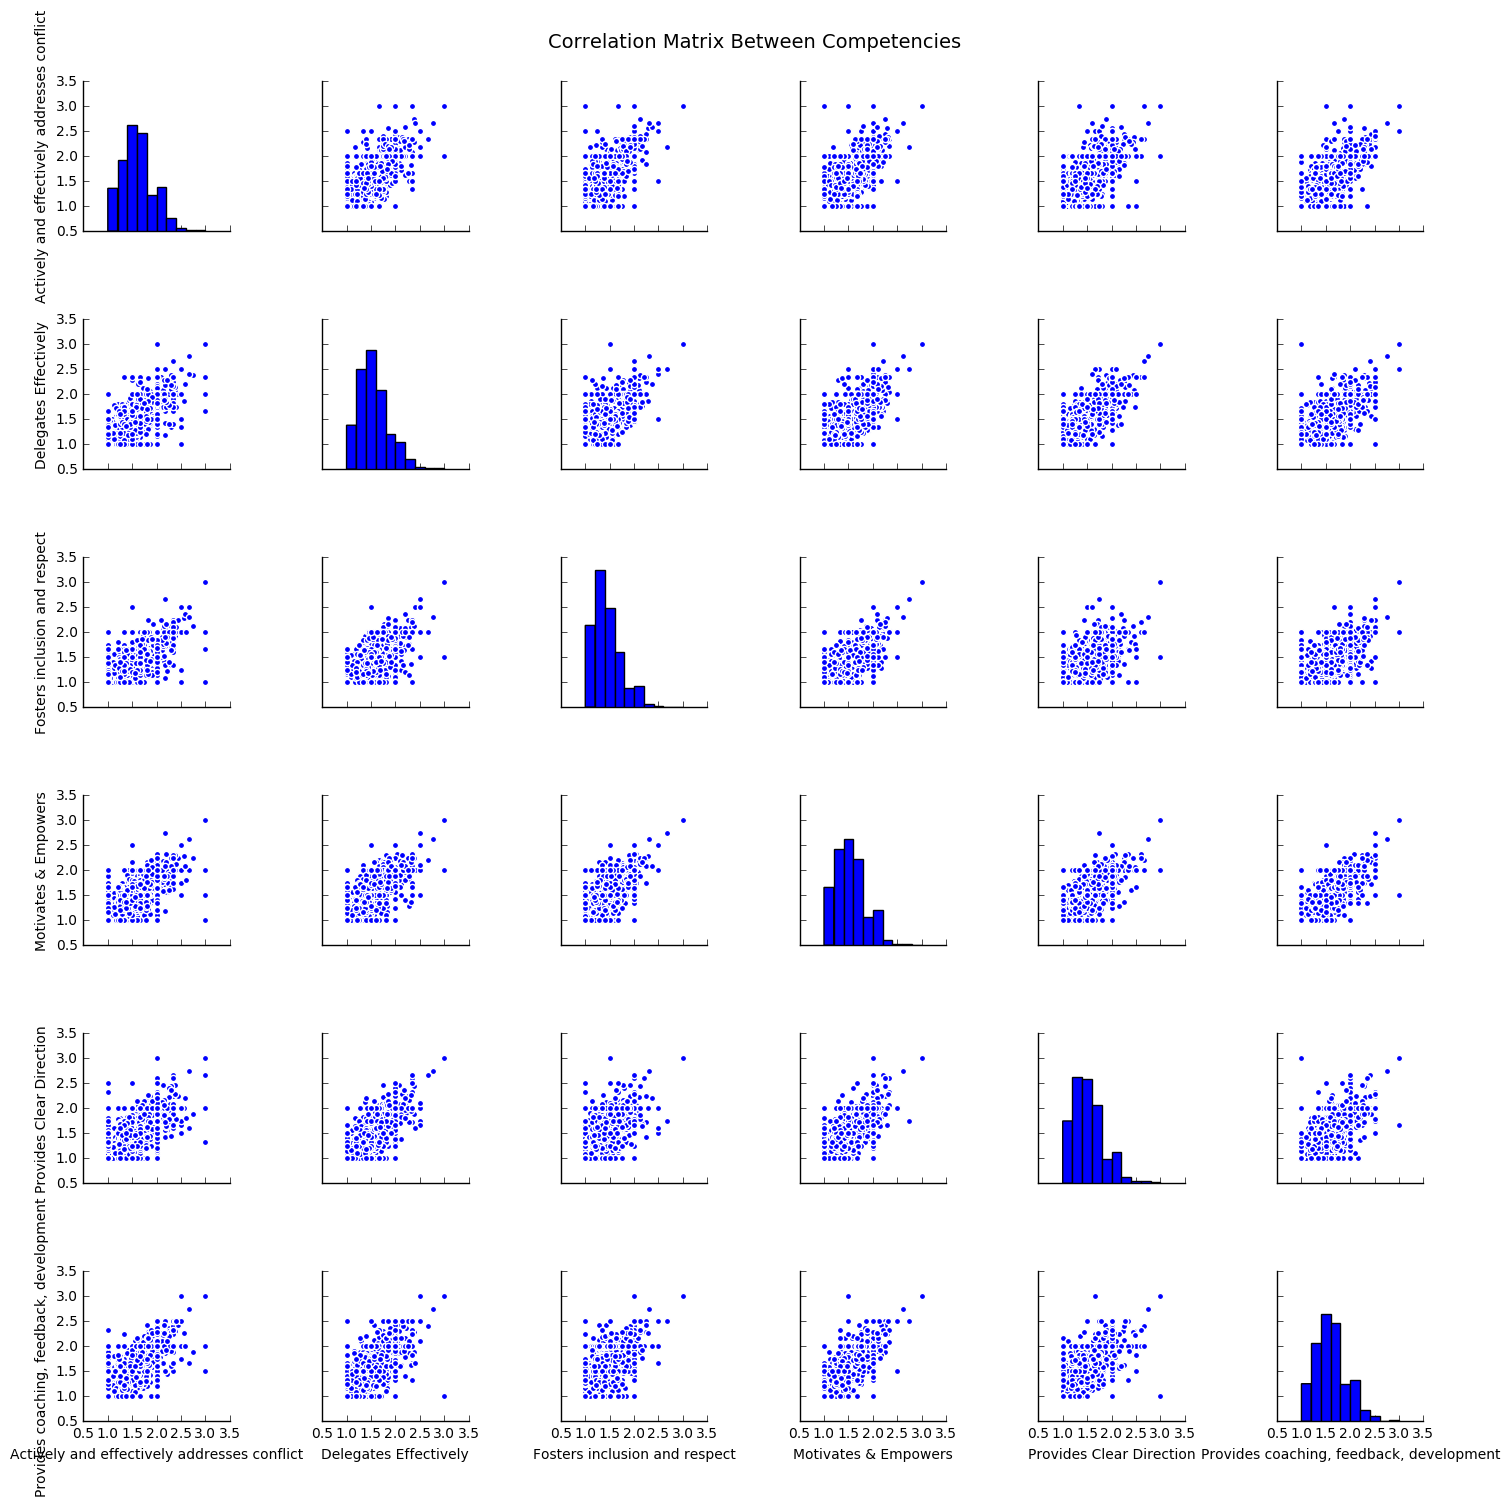

In [93]:
# pairplot
sns.pairplot(mean_table_pca_short.dropna())
plt.suptitle('Correlation Matrix Between Competencies', fontsize = 14)
#plt.savefig('pairplot.png')
plt.show()

In [85]:
mean_table_pca_short.to_excel('test7.xlsx')

C:\Users\tle\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


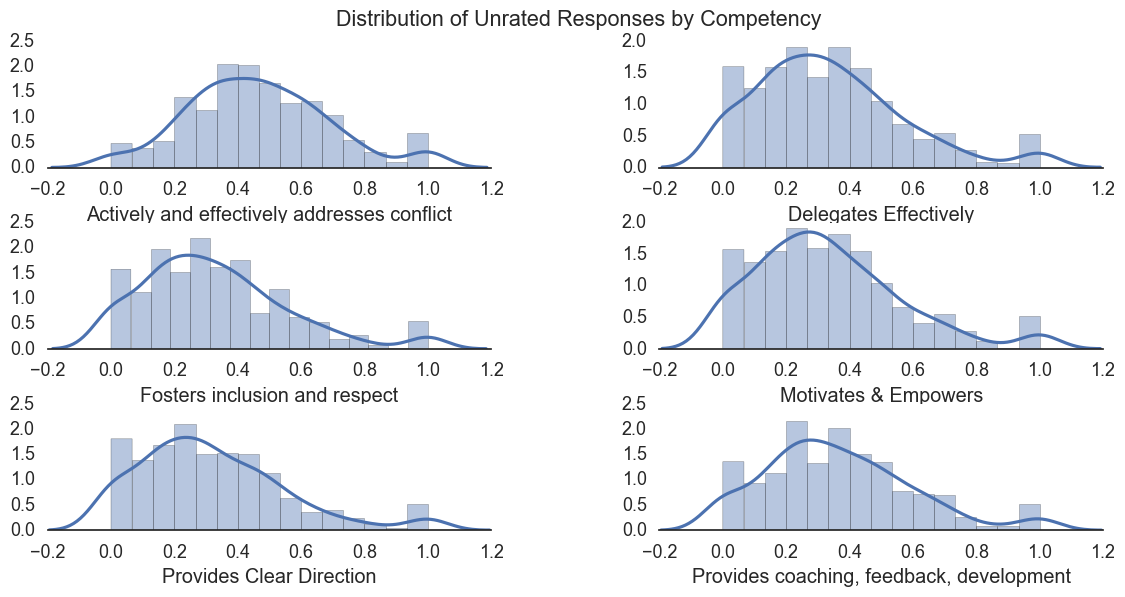

In [412]:
import matplotlib.gridspec as gridspec
fig = plt.figure(1)
gridspec.GridSpec(2,3)

plt.suptitle('Distribution of Unrated Responses by Competency', y = 1)

plt.subplot2grid((2,3), (0,0))
plt.locator_params(axis='x')
plt.locator_params(axis='y')
sns.distplot(pivot2_unrated['Actively and effectively addresses conflict'])

plt.subplot2grid((2,3), (0,1))
plt.locator_params(axis='x')
plt.locator_params(axis='y')
sns.distplot(pivot2_unrated['Delegates Effectively'])

plt.suptitle('Distribution of Unrated Responses by Competency', y = 1)

plt.subplot2grid((2,3), (0,2))
plt.locator_params(axis='x')
plt.locator_params(axis='y')
sns.distplot(pivot2_unrated['Fosters inclusion and respect'])

plt.subplot2grid((2,3), (1,0))
plt.locator_params(axis='x')
plt.locator_params(axis='y')
sns.distplot(pivot2_unrated['Motivates & Empowers'])

plt.subplot2grid((2,3), (1,1))
plt.locator_params(axis='x')
plt.locator_params(axis='y')
sns.distplot(pivot2_unrated['Provides Clear Direction'])

plt.subplot2grid((2,3), (1,2))
plt.locator_params(axis='x')
plt.locator_params(axis='y')
sns.distplot(pivot2_unrated['Provides coaching, feedback, development'])

fig.set_size_inches(w=12,h=6)
fig.tight_layout()

plt.subplot(3,2,1)
sns.distplot(pivot2_unrated['Actively and effectively addresses conflict'])
plt.subplot(3,2,2)
sns.distplot(pivot2_unrated['Delegates Effectively'])
plt.subplot(3,2,3)
sns.distplot(pivot2_unrated['Fosters inclusion and respect'])
plt.subplot(3,2,4)
sns.distplot(pivot2_unrated['Motivates & Empowers'])
plt.subplot(3,2,5)
sns.distplot(pivot2_unrated['Provides Clear Direction'])
plt.subplot(3,2,6)
sns.distplot(pivot2_unrated['Provides coaching, feedback, development'])
sns.despine(left = True)
plt.show()

### EDA for DRI Rating and APR Rating